In [1]:
from helpers.ddmSims.py_ddm_models import ddm_model1a

from itertools import product
import pandas as pd
import seaborn as sns

In [2]:
d = .006
sigma = .08
rangeD = [0.005, 0.006, 0.007]
rangeSigma = [0.065, 0.08, 0.095]
trialsFileName=None
trialsPerCondition=250 
numTrials = 250
numThreads = 9
verbose = False

In [4]:
from helpers.ddmSims.py_ddm_models.util import load_trial_conditions_from_csv

In [5]:
if not trialsFileName:
    trialsFileName = ("helpers/ddmSims/test_data/test_trial_conditions.csv")
trialConditions = load_trial_conditions_from_csv(trialsFileName)

In [6]:
for (QVLeft, QVRight, EVLeft, EVRight, probFractalDraw) in trialConditions:
    print(probFractalDraw != 1 and probFractalDraw != 0)

True
True
True
True
True
False
False
True
True
True
True
True
True
True
False
True
True
True
True
True
True
False


In [8]:
import numpy as np

In [10]:
delta = 1
gamma = 1

np.exp((-1)*delta*((-1)*np.log(0.0000000000001))**gamma)

9.999999999999999e-14

## Recovery with MLA

In [3]:
dataRTLeft, dataRTRight, dataHistLeft, dataHistRight, models, logLikelihoods = ddm_model1a.recover_pars_mla(d, sigma, rangeD, rangeSigma, trialsFileName=trialsFileName, numTrials=numTrials, 
                                                                                    numSimulations=10, binStep=100, maxRT=8000, numThreads=numThreads, verbose=verbose)

/Users/zeynepenkavi/Documents/RangelLab/DescribedVsLearned_beh/analysis/helpers/ddmSims/py_ddm_models/ddm_model1a.py:298: RuntimeWarning: divide by zero encountered in log
  distortedProbFractalDraw = np.exp((-1)*self.delta*((-1)*np.log(probFractalDraw))**self.gamma)
/Users/zeynepenkavi/Documents/RangelLab/DescribedVsLearned_beh/analysis/helpers/ddmSims/py_ddm_models/ddm_model1a.py:298: RuntimeWarning: divide by zero encountered in log
  distortedProbFractalDraw = np.exp((-1)*self.delta*((-1)*np.log(probFractalDraw))**self.gamma)
/Users/zeynepenkavi/Documents/RangelLab/DescribedVsLearned_beh/analysis/helpers/ddmSims/py_ddm_models/ddm_model1a.py:298: RuntimeWarning: divide by zero encountered in log
  distortedProbFractalDraw = np.exp((-1)*self.delta*((-1)*np.log(probFractalDraw))**self.gamma)
/Users/zeynepenkavi/Documents/RangelLab/DescribedVsLearned_beh/analysis/helpers/ddmSims/py_ddm_models/ddm_model1a.py:298: RuntimeWarning: divide by zero encountered in log
  distortedProbFractalDr

In [11]:
df = pd.DataFrame(list(product(rangeD, rangeSigma)), columns=['d', 'sigma'])
df['logLikelihood'] = logLikelihoods
df

,d,sigma,logLikelihood
0,0.005,0.065,-1053.976332
1,0.005,0.080,-1434.445948
2,0.005,0.095,-1615.239855
3,0.006,0.065,-1109.586349
4,0.006,0.080,-1575.243118
5,0.006,0.095,-1449.071916
6,0.007,0.065,-1365.611344
7,0.007,0.080,-1619.265764
8,0.007,0.095,-1481.233492


<AxesSubplot:xlabel='sigma', ylabel='d'>

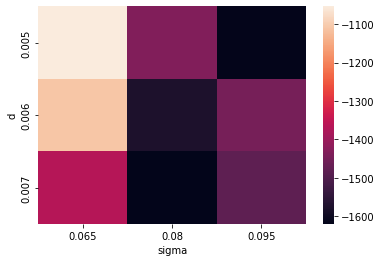

In [12]:
df = df.pivot(index = 'd', columns = 'sigma', values = 'logLikelihood')
sns.heatmap(df)

## Recovery with PTA

In [ ]:
trials, models, likelihoods, posteriors = ddm_model1a.recover_pars_pta(d, sigma, rangeD, rangeSigma, trialsFileName=trialsFileName,
                                                  trialsPerCondition=trialsPerCondition, numThreads=numThreads, verbose=verbose)

/Users/zeynepenkavi/Documents/RangelLab/DescribedVsLearned_beh/analysis/helpers/ddmSims/py_ddm_models/ddm_model1a.py:298: RuntimeWarning: divide by zero encountered in log
  distortedProbFractalDraw = np.exp((-1)*self.delta*((-1)*np.log(probFractalDraw))**self.gamma)


In [ ]:
df = pd.DataFrame(list(product(rangeD, rangeSigma)), columns=['d', 'sigma'])
df['likelihood'] = [sum(likelihoods[k]) for k in likelihoods.keys()]
df

In [ ]:
df = df.pivot(index = 'd', columns = 'sigma', values = 'likelihood')
sns.heatmap(df)

In [ ]:
df = pd.DataFrame(list(product(rangeD, rangeSigma)), columns=['d', 'sigma'])
df['posterior'] = [posteriors[k] for k in posteriors.keys()]
df

In [ ]:
df = df.pivot(index = 'd', columns = 'sigma', values = 'posterior')
sns.heatmap(df)

# Different parameter combination

In [ ]:
d = .06
sigma = .06
rangeD = [0.05, 0.06, 0.07]
rangeSigma = [0.035, 0.06, 0.085]
trialsFileName=None
trialsPerCondition=250 
numTrials = 250
numThreads = 9
verbose = False

## Recovery with MLA

In [ ]:
dataRTLeft, dataRTRight, dataHistLeft, dataHistRight, models, logLikelihoods = ddm_model1a.recover_pars_mla(d, sigma, rangeD, rangeSigma, trialsFileName=trialsFileName, numTrials=numTrials, 
                                                                                    numSimulations=10, binStep=100, maxRT=8000, numThreads=numThreads, verbose=verbose)

In [ ]:
df = pd.DataFrame(list(product(rangeD, rangeSigma)), columns=['d', 'sigma'])
df['logLikelihood'] = logLikelihoods
df

In [ ]:
df = df.pivot(index = 'd', columns = 'sigma', values = 'logLikelihood')
sns.heatmap(df)

## Recovery with PTA

In [ ]:
trials, models, likelihoods, posteriors = ddm_model1a.recover_pars_pta(d, sigma, rangeD, rangeSigma, trialsFileName=trialsFileName,
                                                  trialsPerCondition=trialsPerCondition, numThreads=numThreads, verbose=verbose)

In [ ]:
df = pd.DataFrame(list(product(rangeD, rangeSigma)), columns=['d', 'sigma'])
df['likelihood'] = [sum(likelihoods[k]) for k in likelihoods.keys()]
df

In [ ]:
df = df.pivot(index = 'd', columns = 'sigma', values = 'likelihood')
sns.heatmap(df)

In [ ]:
df = pd.DataFrame(list(product(rangeD, rangeSigma)), columns=['d', 'sigma'])
df['posterior'] = [posteriors[k] for k in posteriors.keys()]
df

In [ ]:
df = df.pivot(index = 'd', columns = 'sigma', values = 'posterior')
sns.heatmap(df)

In [ ]:
import numpy as np

In [ ]:
1 ==1.0